In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
import plplot
from scipy import stats
#from io import StringIO
print(pd.__version__)
#AttributeError: 'Series' object has no attribute 'to_numpy'
import re

import math
import astropy as astro
import scipy.ndimage as spimage
from astropy.io import fits, ascii
from astropy.table import Table, join
from astropy.cosmology import WMAP9 as cosmo
import matplotlib as mpl
#from numpy import std as biweight_midvariance
import matplotlib.cm as cm

from scipy import optimize
from scipy.stats import gaussian_kde
from matplotlib import colors
import scipy.ndimage as ndimage
from collections import Counter
from matplotlib.legend import Legend
import matplotlib.patches as patches
from matplotlib import pyplot
from mpl_toolkits.axes_grid1 import make_axes_locatable
#
#
#
import extinction


#
# seaborn
#
import pandas.util.testing as tm
import seaborn as sns

#
# Jorge
#

from sel2dhist_xy import sel2dhist_xy


#
# 3D plots!
#
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#biweight_midvariance
from scipy.stats import binned_statistic_2d
from scipy.ndimage.filters import gaussian_filter

import warnings
warnings.simplefilter("ignore")

#
# my_utils
#
from my_utils import *

#
#
#
from ndtest import *
from sklearn.decomposition import PCA

#
#
#
from scipy.optimize import leastsq, fmin
import matplotlib.animation as animation

#
# Carlos Color map
#
from cmaps_CLC import vel_map

from scipy.spatial import KDTree

from scipy.interpolate import griddata
from matplotlib.colors import LogNorm

1.1.1
1.1.1


<ipython-input-1-1c21bac5301d>:41: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
<ipython-input-1-1c21bac5301d>:61: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [2]:
from matplotlib import rcParams as rc
rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


In [3]:
#
# Reading get_proc_elines table!
# 
get_proc_elines="tables/get_proc_elines_CALIFA.clean.csv"
col_proc_elines=header_columns_header(get_proc_elines,2)
tab_pe=ascii.read(get_proc_elines, delimiter=',', guess=True, comment='\s*#', names=col_proc_elines,\
                      fill_values=[('BAD', np.nan)])


In [4]:
list_columns(tab_pe.columns)

name                                NH_Re_log                           e_NO_Re_fit_EPM09                   T60                                 
log_Mass_no_corr                    NO_Re_log                           alpha_NO_Re_fit_EPM09               ZH_T60                              
lSFR                                sigma_cen_Ha                        e_alpha_NO_Re_fit_EPM09             ZH_Re_T60                           
OH_O3N2                             e_sigma_cen_Ha                      cc_r_NO_EPM09                       a_ZH_T60                            
e_OH_O3N2                           rat_vel_sigma                       sig_r_NO_EPM09                      T70                                 
a_ion_cen[3]                        e_rat_vel_sigma                     NO_Re_fit_N2S2                      ZH_T70                              
frac_area_GAS                       OH_Re_fit_pyqz                      e_NO_Re_fit_N2S2                    ZH_Re_T70             

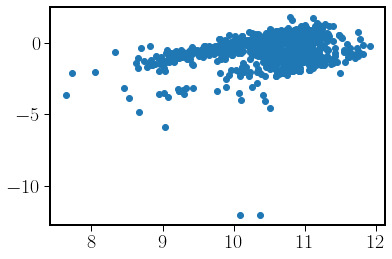

In [5]:
plt.scatter(tab_pe['log_Mass_corr'],tab_pe['lSFR'])

In [6]:
#mask_good = (tab_pe['log_Mass'])

In [7]:
name = 'NGC5947'
tab_obj  = tab_pe[tab_pe['name'] == name]

In [8]:
print(tab_obj)

  name  log_Mass_no_corr ...  NH_R_ALL_mean     NH_R_ALL_error 
------- ---------------- ... ---------------- -----------------
NGC5947 10.7116330062635 ... 7.86918944133953 0.334246999769499


In [9]:
def read_Pipe3D_CALIFA(name,DIR='',verbose=0):
#    dat=name.split("-")
#    plate=dat[1]
#    ifu=dat[2]
    DIR_plate=DIR#+"/"+plate+"/"
    Pipe3D_file=DIR_plate+name+".Pipe3D.cube.fits.gz"
    Pipe3D_hdu=fits.open(Pipe3D_file)


    ######################################################
    # SSP cube                                           #
    ######################################################    
#    SELECT_REG_data=Pipe3D_hdu[8].data
#    SELECT_REG_data=1
    SSP_data=Pipe3D_hdu[1].data
    SELECT_REG_data=SSP_data[0]/SSP_data[0]
    SELECT_REG_data[np.isnan(SELECT_REG_data)]=0.0
    mask_V = SSP_data[0]<0.002
    SELECT_REG_data[mask_V]=0.0
    SSP_hdr=Pipe3D_hdu[1].header
    (nz,ny,nx)=SSP_data.shape
    SSP_maps={}
    SSP_key={}
    SSP_key[0]="V"
    SSP_key[1]="CS"
    SSP_key[2]="DZ"
    SSP_key[3]="med"
    SSP_key[4]="std"
    SSP_key[5]="A_L"
    SSP_key[6]="A_M"
    SSP_key[7]="e_A_M"
    SSP_key[8]="Z_L"
    SSP_key[9]="Z_M"
    SSP_key[10]="e_Z_M"
    SSP_key[11]="Av"
    SSP_key[12]="e_Av"
    SSP_key[13]="vel"
    SSP_key[14]="e_vel"
    SSP_key[15]="sig"
    SSP_key[16]="e_sig"
    SSP_key[17]="ML"
    SSP_key[18]="M"
    SSP_key[19]="Md"
    SSP_key[20]="e_M"
    for indx in arange(0,nz):
        val=SSP_key[indx]
#        print(indx,val)
        image=SSP_data[indx,:,:]
        image = np.ma.masked_invalid(image)
        image=image*SELECT_REG_data
        image=image*1.0
        if ((indx!=13) and (indx!=14) and (indx!=8) and (indx!=9)):
            image=np.ma.masked_array(image,\
                                 ~(image>0.0))
        else:
            image=np.ma.masked_array(image,\
                                 (image==0.0))
        SSP_maps[val]=image

        
    ######################################################
    # SFH cube                                           #
    ######################################################
    SFH_data=Pipe3D_hdu[2].data
    SFH_hdr=Pipe3D_hdu[2].header
    (nz,ny,nx)=SFH_data.shape
    SFH_maps={}
    SFH_key={}
    age_met=[]
    age=[]
    met=[]
    n_age=0
    n_met=0
    n_age_met=0
    for i in arange(0,nz):
        key='DESC_'+str(i)
        mark_labels=SFH_hdr[key]    
        mark_labels=mark_labels.replace('Luminosity Fraction for ','')
        mark_labels=mark_labels.replace(' SSP','')
        SFH_key[i]=mark_labels.replace(' ','_')
        image=SFH_data[i,:,:]
        image = np.ma.masked_invalid(image)
        image=image*SELECT_REG_data
        image=image*1.0
        image=np.ma.masked_array(image,\
                                 (image==0.0))               
        SFH_maps[SFH_key[i]]=image
        if (mark_labels.find('age-met')>-1):
            n_age_met=n_age_met+1
            age_met.append(mark_labels.replace('age-met ',''))
        else:
            if (mark_labels.find('age')>-1):
                n_age=n_age+1
                age.append(mark_labels.replace('age ',''))
            else:
                if (mark_labels.find('met')>-1):
                    n_met=n_met+1
                    met.append(mark_labels.replace('met ',''))
       
    age_met=np.array(age_met)
    age=np.array(age)
    met=np.array(met)    
   
    ######################################################
    # IND cube                                           #
    ######################################################
    IND_data=Pipe3D_hdu[3].data
    IND_hdr=Pipe3D_hdu[3].header
    (nz,ny,nx)=IND_data.shape
    IND_maps={}
    IND_key={}
    for i in arange(0,nz):
        key='INDEX'+str(i)
        mark_labels=IND_hdr[key]    
        IND_key[i]=mark_labels.replace(' ','_')
        image=IND_data[i,:,:]
        image = np.ma.masked_invalid(image)
        image=image*SELECT_REG_data
        image=image*1.0
        image=np.ma.masked_array(image,\
                                 (image==0.0))               
        IND_maps[IND_key[i]]=image


    ######################################################
    # FLUX_ELINES cube                                           #
    ######################################################
    FE_data=Pipe3D_hdu[5].data
    FE_hdr=Pipe3D_hdu[5].header
    (nz,ny,nx)=FE_data.shape
    FE_maps={}
    FE_key={}
    for i in arange(0,nz):
        key='NAME'+str(i)
#        wave='WAVE'+str(i)
        mark_labels=FE_hdr[key]#+'_'+FE_hdr[wave]    
        FE_key[i]=mark_labels.replace(' ','_')
        image=FE_data[i,:,:]
        image = np.ma.masked_invalid(image)
        image=image*SELECT_REG_data
        image=image*1.0
        image=np.ma.masked_array(image,\
                                 (image==0.0))               
        FE_maps[FE_key[i]]=image
        
        
    if (verbose==1):
        print(Pipe3D_hdu.info())
        print('SSP:',SSP_key)
        print('n_SSPs:',n_age_met,', n_ages:',n_age,n_met)
        print('SFH:',SFH_key)
        print('IND:',IND_key)
        print('ELINES:',ELINES_key)
        print('FE:',FE_key)
#        print('FEL:',FEL_key)
  
    output={'hdr':Pipe3D_hdu[0].header,'SSP':SSP_maps,'SFH':SFH_maps,\
            'AGE':age,'MET':met,'AGE-MET':age_met,\
           'IND':IND_maps,'FE':FE_maps}#,'FEL':FEL_maps,'GAIA_MASK':GA_data,'MASK':MASK_data}
    return output



In [10]:
maps=read_Pipe3D_CALIFA(name,DIR='data/',verbose=0)
al=np.array(list(maps['FE'].keys()))
print(al[np.char.find(al,'Ha')>-1])

['flux_Ha' 'vel_Ha' 'disp_Ha' 'EW_Ha' 'e_flux_Ha' 'e_vel_Ha' 'e_disp_Ha'
 'e_EW_Ha']


In [11]:
name_now=name
#DIR='/disk-a/sanchez/HIIExplorer/CALIFA/'
DIR='data/'
DIR_plate=DIR
Pipe3D_file=DIR_plate+name_now+".Pipe3D.cube.fits.gz"
Pipe3D_hdu=fits.open(Pipe3D_file)
print(Pipe3D_hdu.info())


#SELECT_REG_data=1 #Pipe3D_hdu[8].data
SSP_data=Pipe3D_hdu[1].data
SELECT_REG_data=SSP_data[0]/SSP_data[0]
SELECT_REG_data[np.isnan(SELECT_REG_data)]=0.0
mask_V = SSP_data[0]<0.002
SELECT_REG_data[mask_V]=0.0

SSP_hdr=Pipe3D_hdu[1].header
(nz,ny,nx)=SSP_data.shape
SSP_maps={}
SSP_key={}
SSP_key[0]="V"
SSP_key[1]="CS"
SSP_key[2]="DZ"
SSP_key[3]="med"
SSP_key[4]="std"
SSP_key[5]="A_L"
SSP_key[6]="A_M"
SSP_key[7]="e_A_M"
SSP_key[8]="Z_L"
SSP_key[9]="Z_M"
SSP_key[10]="e_Z_M"
SSP_key[11]="Av"
SSP_key[12]="e_Av"
SSP_key[13]="vel"
SSP_key[14]="e_vel"
SSP_key[15]="sig"
SSP_key[16]="e_sig"
SSP_key[17]="ML"
SSP_key[18]="M"
SSP_key[19]="Md"
SSP_key[20]="e_M"

for indx in arange(0,nz):
    val=SSP_key[indx]
    print(indx,val)
    image=SSP_data[indx,:,:]
    image = np.ma.masked_invalid(image)
    image=image*SELECT_REG_data
    image=image*1.0
    if ((indx!=13) and (indx!=14) and (indx!=8) and (indx!=9)):
        image=np.ma.masked_array(image,\
                                 ~(image>0.0))
    else:
        image=np.ma.masked_array(image,\
                                 (image==0.0))
    SSP_maps[val]=image
    

Filename: data/NGC5947.Pipe3D.cube.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  ORG_HDR       1 PrimaryHDU     524   ()      
  1  SSP           1 ImageHDU       118   (160, 149, 21)   float64   
  2  SFH           1 ImageHDU      1608   (160, 149, 319)   float64   
  3  INDICES       1 ImageHDU       109   (160, 149, 96)   float64   
  4  ELINES        1 ImageHDU        68   (160, 149, 11)   float64   
  5  FLUX_ELINES    1 ImageHDU      1310   (160, 149, 432)   float64   
  6  FLUX_ELINES_LONG    1 ImageHDU      3134   (160, 149, 1040)   float64   
  7  GAIA_MASK     1 ImageHDU        10   (160, 149)   float64   
  8  SELECT_REG    1 ImageHDU        10   (160, 149)   int64   
None
0 V
1 CS
2 DZ
3 med
4 std
5 A_L
6 A_M
7 e_A_M
8 Z_L
9 Z_M
10 e_Z_M
11 Av
12 e_Av
13 vel
14 e_vel
15 sig
16 e_sig
17 ML
18 M
19 Md
20 e_M


DESC_0 pseudo V-band map
DESC_1  continuum segmentation file
DESC_2  continuum dezonification file
DESC_3  median intensity flux within the wavelength range
DESC_4  StdDev median intensity flux within the wavelength range
DESC_5  luminosity weighted age of the stellar population
DESC_6  mass weighted age of the stellar population
DESC_7  error of the age of the stellar population
DESC_8  luminosity weighted metallicity of the stellar population
DESC_9  mass weighted metallicity of the stellar population
DESC_10  error metallicity of the stellar population
DESC_11  average dust attnuation of the stellar population
DESC_12  error of the average dust attnuation of the stellar population
DESC_13  velocity of the stellar population
DESC_14  error in the velocity of the stellar population
DESC_15  velocity dispersion of the stellar population
DESC_16  error in velocity dispersion of the stellar population
DESC_17  average mass-to-light ratio of the stellar population
DESC_18  stellar mass de

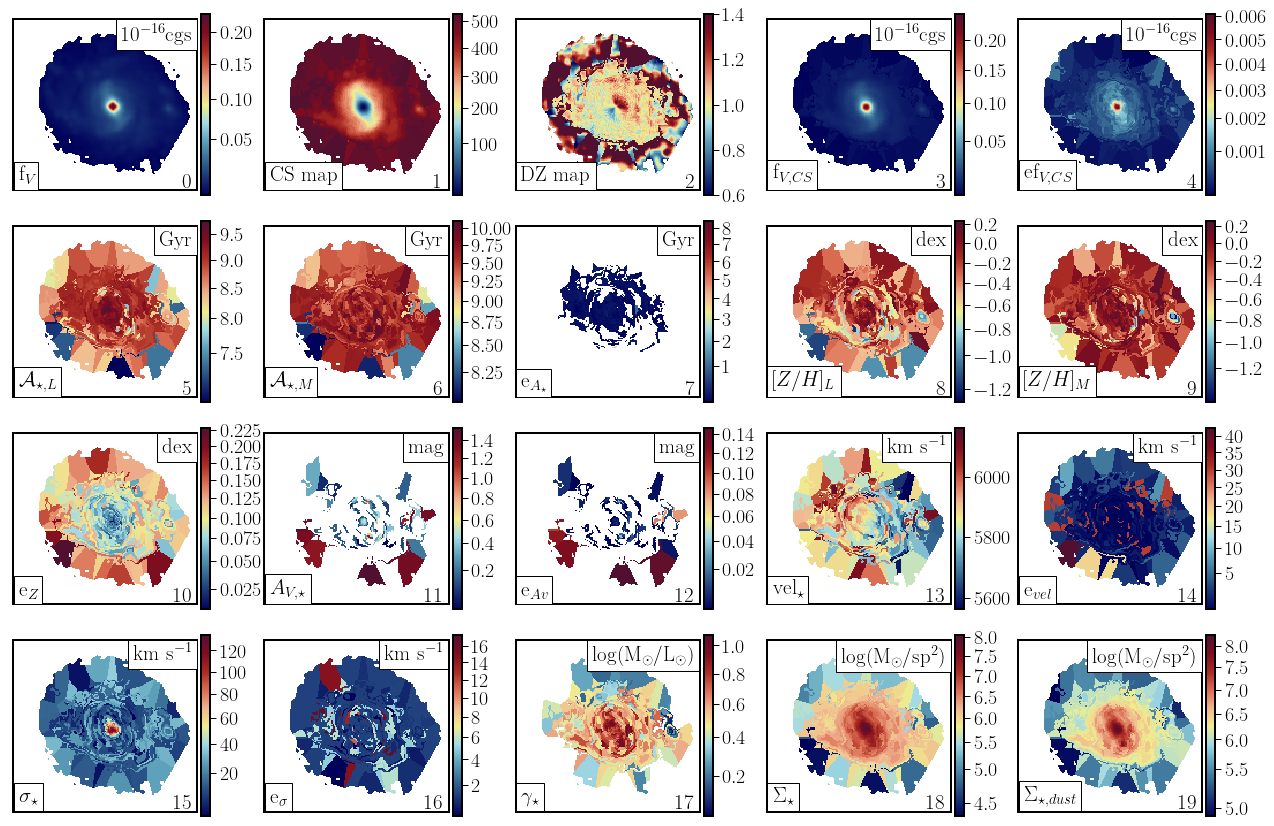

In [30]:
figname=name_now+".SSP"
#SELECT_REG_data=1 #Pipe3D_hdu[8].data
SSP_data=Pipe3D_hdu[1].data
SSP_hdr=Pipe3D_hdu[1].header
(nz,ny,nx)=SSP_data.shape
SSP_maps={}
#labels=['V-band img','CS map','DZ map','']
#for i in arange(0,nz,1):
#    key='DESC_'+str(i)
#    val=SSP_hdr[key]
#print(SELECT_REG_data)

SSP_labels={}#np.zeros(nz)
SSP_labels[0]=r'f$_V$'
SSP_labels[1]='CS map'
SSP_labels[2]='DZ map'
SSP_labels[3]=r'f$_{V,CS}$'#DESC_3  median intensity flux within the wavelength range
SSP_labels[4]=r'ef$_{V,CS}$'#  StdDev median intensity flux within the wavelength range
SSP_labels[5]=r'$\mathcal{A}_{\star,L}$'#  luminosity weighted age of the stellar population
SSP_labels[6]=r'$\mathcal{A}_{\star,M}$'#  mass weighted age of the stellar population
SSP_labels[7]=r'e$_{A_\star}$'  #error of the age of the stellar population
SSP_labels[8]=r'$[Z/H]_L$'#  luminosity weighted metallicity of the stellar population
SSP_labels[9]=r'$[Z/H]_M$'#  mass weighted metallicity of the stellar population
SSP_labels[10]=r'e$_{Z}$'#  error metallicity of the stellar population
SSP_labels[11]=r'$A_{V,\star}$'#  average dust attnuation of the stellar population
SSP_labels[12]=r'e$_{Av}$'#  error of the average dust attnuation of the stellar population
SSP_labels[13]=r'vel$_\star$'#  velocity of the stellar population
SSP_labels[14]=r'e$_{vel}$'#  error in the velocity of the stellar population
SSP_labels[15]=r'$\sigma_\star$'#  velocity dispersion of the stellar population
SSP_labels[16]=r'e$_\sigma$'#  error in velocity dispersion of the stellar population
SSP_labels[17]=r'$\gamma_\star$'#  average mass-to-light ratio of the stellar population
SSP_labels[18]=r'$\Sigma_\star$'#  stellar mass density
SSP_labels[19]=r'$\Sigma_{\star,dust}$' #   stellar mass density dust corrected

SSP_ulabels={}#np.zeros(nz)
SSP_ulabels[0]='10$^{-16}$cgs'
SSP_ulabels[1]=''
SSP_ulabels[2]=''
SSP_ulabels[3]=r'10$^{-16}$cgs'#DESC_3  median intensity flux within the wavelength range
SSP_ulabels[4]=r'10$^{-16}$cgs'#  StdDev median intensity flux within the wavelength range
SSP_ulabels[5]=r'Gyr'#  luminosity weighted age of the stellar population
SSP_ulabels[6]=r'Gyr'#  mass weighted age of the stellar population
SSP_ulabels[7]=r'Gyr'  #error of the age of the stellar population
SSP_ulabels[8]=r'dex'#  luminosity weighted metallicity of the stellar population
SSP_ulabels[9]=r'dex'#  mass weighted metallicity of the stellar population
SSP_ulabels[10]=r'dex'#  error metallicity of the stellar population
SSP_ulabels[11]=r'mag'#  average dust attnuation of the stellar population
SSP_ulabels[12]=r'mag'#  error of the average dust attnuation of the stellar population
SSP_ulabels[13]=r'km s$^{-1}$'#  velocity of the stellar population
SSP_ulabels[14]=r'km s$^{-1}$'#  error in the velocity of the stellar population
SSP_ulabels[15]=r'km s$^{-1}$'#  velocity dispersion of the stellar population
SSP_ulabels[16]=r'km s$^{-1}$'#  error in velocity dispersion of the stellar population
SSP_ulabels[17]=r'log(M$_\odot$/L$_\odot$)'#  average mass-to-light ratio of the stellar population
SSP_ulabels[18]=r'log(M$_\odot$/sp$^2$)'#  stellar mass density
SSP_ulabels[19]=r'log(M$_\odot$/sp$^2$)' #   stellar mass density dust corrected



fig, axes = plt.subplots(4,5, figsize=(18,12))
#cmap='gist_stern_r'
#cmap='plasma'
#color_cm_now = vel_map()
color_cm_now = vel_map()
reverse=0
if (reverse==1):
    color_cm_now=color_cm_now.reversed()
cmap=cm.get_cmap(color_cm_now)

for indx,ax in enumerate(axes.flat):
    key='DESC_'+str(indx)
    val=SSP_hdr[key]
    print(key,val)
    image=SSP_data[indx,:,:]
#    vmin=np.min(image)
#   vmax=np.max(image)
#   print(indx,val,vmin,vmax)
    image = np.ma.masked_invalid(image)
    image=image*SELECT_REG_data
    image=image*1.0
    if ((indx!=13) and (indx!=14) and (indx!=8) and (indx!=9)):
        image=np.ma.masked_array(image,\
                                 ~(image>0.0))
    else:
        image=np.ma.masked_array(image,\
                                 (image==0.0))
    #if ((indx!=0) and (indx!=3) and (indx!=4) and (indx!=12)):
    #    image=np.around(image,2)
    vmin=np.min(image)
    vmax=np.max(image)
    norm=colors.PowerNorm(gamma=0.75)
    if (indx==13):
        vmin=np.ma.median(image)-300
        vmax=np.ma.median(image)+300
        norm=None
    if (indx==2):
        vmin=1.4
        vmax=0.6
        norm=None
#    print(indx,val,vmin,vmax)
    im_now=ax.imshow(image, interpolation='none',\
                     cmap=cmap, \
                     norm=norm,\
                      vmin=vmin,vmax=vmax)
    fig.colorbar(im_now, ax=ax, orientation='vertical',fraction=0.046, pad=0.02)
    ax.set_xlim(0,nx)
    ax.set_ylim(0,ny)
    ax.text(0.03*nx, 0.03*ny, SSP_labels[indx], fontsize=21, bbox={'facecolor': 'white', 'pad': 5},\
           va='bottom',ha='left')
    ax.text(0.97*nx, 0.97*ny, SSP_ulabels[indx], fontsize=21, bbox={'facecolor': 'white', 'pad': 5},\
            va='top',ha='right')
    ax.text(0.97*nx, 0.1*ny, str(indx), fontsize=21,\
            va='top',ha='right')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    #ax.spines['left'].set_visible(False)
#    handles, labels = ax.get_legend_handles_labels()
#    ax.legend(handles, labels,loc=(0.05,0.75),frameon=True,handlelength=1.5)    
#fig.tight_layout()
fig.tight_layout(w_pad=0.35,h_pad=0.35)

fig.savefig(figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

#    SSP_maps[val]=SSP_data[i,:,:]
#print(SSP_maps['pseudo V-band map'])

#print(nx)

In [13]:
figname=name_now+".SFH"
#SELECT_REG_data=1 #Pipe3D_hdu[8].data
SFH_data=Pipe3D_hdu[2].data
SFH_hdr=Pipe3D_hdu[2].header
(nz,ny,nx)=SFH_data.shape
SFH_maps={}
SFH_labels={}
mark_labels={}
for i in arange(0,nz):
    key='DESC_'+str(i)
    SFH_labels[i]=SFH_hdr[key]
    mark_labels_now=SFH_labels[i]
    print(i,mark_labels_now)

0 Luminosity Fraction for age-met 0.0010-0.0001 SSP
1 Luminosity Fraction for age-met 0.0010-0.0005 SSP
2 Luminosity Fraction for age-met 0.0010-0.0020 SSP
3 Luminosity Fraction for age-met 0.0010-0.0080 SSP
4 Luminosity Fraction for age-met 0.0010-0.0170 SSP
5 Luminosity Fraction for age-met 0.0010-0.0300 SSP
6 Luminosity Fraction for age-met 0.0010-0.0400 SSP
7 Luminosity Fraction for age-met 0.0023-0.0001 SSP
8 Luminosity Fraction for age-met 0.0023-0.0005 SSP
9 Luminosity Fraction for age-met 0.0023-0.0020 SSP
10 Luminosity Fraction for age-met 0.0023-0.0080 SSP
11 Luminosity Fraction for age-met 0.0023-0.0170 SSP
12 Luminosity Fraction for age-met 0.0023-0.0300 SSP
13 Luminosity Fraction for age-met 0.0023-0.0400 SSP
14 Luminosity Fraction for age-met 0.0038-0.0001 SSP
15 Luminosity Fraction for age-met 0.0038-0.0005 SSP
16 Luminosity Fraction for age-met 0.0038-0.0020 SSP
17 Luminosity Fraction for age-met 0.0038-0.0080 SSP
18 Luminosity Fraction for age-met 0.0038-0.0170 SSP
19 

160 149 39
10


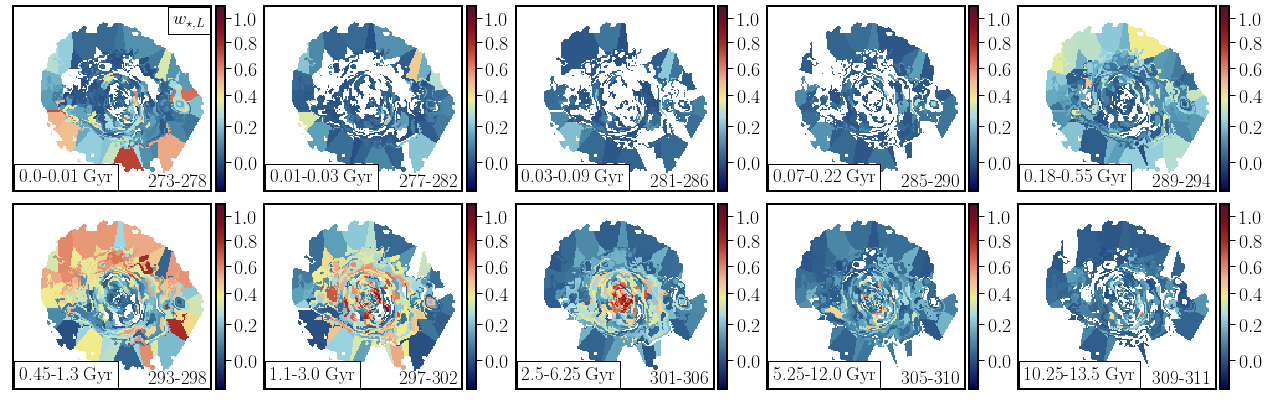

In [14]:
figname=name_now+".SFH"
#SELECT_REG_data=1 #Pipe3D_hdu[8].data
SFH_data=Pipe3D_hdu[2].data
SFH_hdr=Pipe3D_hdu[2].header
(nz,ny,nx)=SFH_data.shape
SFH_maps={}
SFH_labels={}
mark_labels={}
for i in arange(0,nz):
    key='DESC_'+str(i)
    SFH_labels[i]=SFH_hdr[key]
    mark_labels_now=SFH_labels[i]
    
    mark_labels_now=mark_labels_now.replace('Luminosity Fraction for age ','')
    mark_labels_now=mark_labels_now.replace(' SSP','')
    mark_labels[i]=mark_labels_now
#    print(i,mark_labels[i])
#    print(i,SFH_labels[i])

n_start=39*7
I_max=39
n_end=n_start+I_max
SFH_age=SFH_data[n_start:n_end,:,:]
(nz_age,ny_age,nx_age)=SFH_age.shape
print(nx_age,ny_age,nz_age)
n_bin=4
nz_bin=int(np.ceil(nz_age/n_bin))
mark_labels_bin={}
SFH_age_bin=np.zeros((nz_bin,ny_age,nx_age))
label_index={}
for i in arange(0,nz_bin):
    j_min=n_bin*i
    j_max=n_bin*(i+1)+1
    if (j_max>=I_max):
        j_max=I_max-1
    label_index[i]=str(j_min+n_start)+'-'+str(j_max+n_start)
    mark_labels_bin[i]=str(np.around(float(mark_labels[j_min+n_start]),2))+'-'+str(np.around(float(mark_labels[j_max+n_start]),2))+' Gyr'
#    mark_labels[j_min+n_start]+'-'+mark_labels[j_max+n_start]
    for j in arange(j_min,j_max):
        SFH_age_bin[i,:,:]=SFH_age_bin[i,:,:]+SFH_age[j,:,:]
#        print(i,mark_labels_bin[i])
#        print(i,j)

print(nz_bin)
NX=5
fig, axes = plt.subplots(int(np.ceil(nz_bin/NX)),NX, figsize=(int(3.6*NX),int(3*nz_bin/NX)))
#cmap='gist_stern_r'
#cmap='plasma'
#color_cm_now = vel_map()
color_cm_now = vel_map()
reverse=0
if (reverse==1):
    color_cm_now=color_cm_now.reversed()
cmap=cm.get_cmap(color_cm_now)



n_start=39*7
I_max=39
for I,ax in enumerate(axes.flat):
    if (I<nz_bin):
        indx=I+n_start
        key='DESC_'+str(indx)
        val=SFH_hdr[key]
#        print(key,val)
        image=SFH_age_bin[I,:,:]
        image = np.ma.masked_invalid(image)
        image=image*SELECT_REG_data
        image=image*1.0
        image=np.ma.masked_array(image,\
                                 (image==0.0))
        image=np.around(image,2)
        vmin=np.min(image)
        vmax=np.max(image)
        norm=colors.PowerNorm(gamma=0.75)
        im_now=ax.imshow(image, interpolation='none',\
                         cmap=cmap, \
                         norm=norm,\
                         vmin=-0.1,vmax=1.1)
        fig.colorbar(im_now, ax=ax, orientation='vertical',fraction=0.046, pad=0.02)
        ax.set_xlim(0,nx)
        ax.set_ylim(0,ny)
        ax.text(0.03*nx, 0.03*ny, mark_labels_bin[I], fontsize=19, \
                bbox={'facecolor': 'white', 'pad': 5},\
                va='bottom',ha='left')
        if (I==0):
            ax.text(0.97*nx, 0.97*ny, r'$w_{\star,L}$', fontsize=19,\
                    bbox={'facecolor': 'white', 'pad': 5},\
                    va='top',ha='right')
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.text(0.97*nx, 0.1*ny, label_index[I], fontsize=19,\
                va='top',ha='right')        
    else:
        ax.set_visible(False)
    #ax.spines['left'].set_visible(False)
#    handles, labels = ax.get_legend_handles_labels()
#    ax.legend(handles, labels,loc=(0.05,0.75),frameon=True,handlelength=1.5)    
#fig.tight_layout()
fig.tight_layout(w_pad=0.15,h_pad=0.35)

fig.savefig(figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

#    SSP_maps[val]=SSP_data[i,:,:]
#print(SSP_maps['pseudo V-band map'])

#print(nx)

In [15]:
def add_colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("top", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax,orientation='horizontal')
    cax.xaxis.set_ticks_position('top')
    plt.sca(last_axes)
    return cbar


(0.0, 148.0)

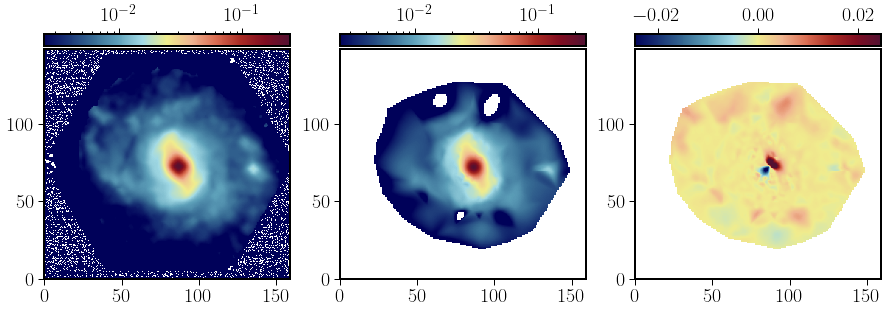

In [16]:
#
# Deriving the PT
#
V_map = SSP_data[0]
CS_V_map = SSP_data[3]
CS_map = SSP_data[1]
cs_max = int(np.max(CS_map))
cs_x = []
cs_y = []
cs_flux = []
for i in arange(1,cs_max+1):
    ids = np.argwhere(CS_map==i)
    ids = np.array(ids)    
#    print(i,ids,ids[0][0],ids[0][1])
#    print(i,ids,len(ids),ids[0],ids[0][0],ids[0][1])#,ids[:][1])
    I = []
    J = []    
    for j in arange(len(ids)):
        I.append(ids[j][0])
        J.append(ids[j][1])
    x_now = np.mean(np.array(J))
    y_now = np.mean(np.array(I))
    cs_y.append(y_now)
    cs_x.append(x_now)
    cs_flux.append(CS_V_map[int(y_now),int(x_now)])
cs_x=np.array(cs_x)
cs_y=np.array(cs_y)
cs_flux=np.array(cs_flux)

(ny,nx)=np.shape(CS_map)
#print(nx,ny)
x_int = np.arange(0,nx,1)
y_int = np.arange(0,ny,1)
points=np.array((cs_x,cs_y)).T
#print(len(points),len(cs_flux),len(x_int))
xx, yy = np.meshgrid(x_int, y_int)
method='cubic'

map_int = griddata(points, cs_flux, (xx, yy), method=method)
map_res = V_map-map_int

min_val, max_val = np.abs(np.amin(CS_V_map)), np.abs(np.amax(CS_V_map))
min_val=0.01*max_val
fig,ax = plt.subplots(1,3,figsize=(15,6))

im0=ax[0].imshow(V_map,cmap=cmap,norm=LogNorm(vmin=min_val,vmax=max_val))
im1=ax[1].imshow(map_int,cmap=cmap,norm=LogNorm(vmin=min_val,vmax=max_val))
im2=ax[2].imshow(map_res,cmap=cmap,vmin=-0.1*max_val,vmax=0.1*max_val)
add_colorbar(im0)
add_colorbar(im1)
add_colorbar(im2)
#ax[0].colorbar()
#ax[0].scatter(cs_x,cs_y,edgecolor='none',s=2, color='black')
ax[0].set_xlim([0,nx-1])
ax[0].set_ylim([0,ny-1])
ax[1].set_xlim([0,nx-1])
ax[1].set_ylim([0,ny-1])
ax[2].set_xlim([0,nx-1])
ax[2].set_ylim([0,ny-1])


In [17]:
#points=np.array((cs_x,cs_y)).T
from scipy.spatial import cKDTree
from scipy.spatial import KDTree

In [18]:
mytree = cKDTree(points)
dist, indexes = mytree.query(points,k=4)

In [19]:
print(len(points))
cs_ind=150
print(dist[cs_ind],indexes[cs_ind],points[indexes[cs_ind]])

print(points.shape)
print(points[0])

526
[0.         1.57233019 1.58113883 2.06155281] [150 165 133 142] [[90.         63.5       ]
 [91.33333333 62.66666667]
 [89.5        65.        ]
 [88.         64.        ]]
(526, 2)
[86. 72.]


(0.0, 148.0)

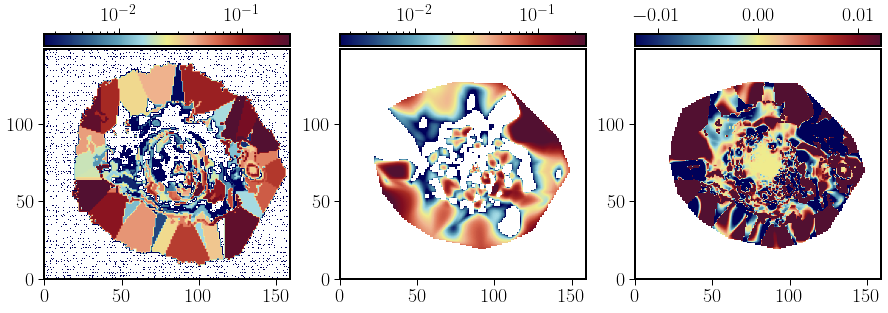

In [20]:
#
# Deriving the PT
#
org_map = SFH_age_bin[1]

CS_V_map = SSP_data[3]
CS_map = SSP_data[1]
cs_max = int(np.max(CS_map))
cs_x = []
cs_y = []
cs_flux = []
for i in arange(1,cs_max+1):
    ids = np.argwhere(CS_map==i)
    ids = np.array(ids)    
    I = []
    J = []    
    for j in arange(len(ids)):
        I.append(ids[j][0])
        J.append(ids[j][1])
    x_now = np.mean(np.array(J))
    y_now = np.mean(np.array(I))
    cs_y.append(y_now)
    cs_x.append(x_now)
#   cs_flux.append(org_map[int(np.rint(y_now)),int(np.rint(x_now))])
cs_x=np.array(cs_x)
cs_y=np.array(cs_y)
#cs_flux=np.array(cs_flux)



(ny,nx)=np.shape(CS_map)
#print(nx,ny)
x_int = np.arange(0,nx,1)
y_int = np.arange(0,ny,1)
points=np.array((cs_x,cs_y)).T
xx, yy = np.meshgrid(x_int, y_int)
method='cubic'
cs_flux=org_map[np.rint(points).astype(int)[:,1],np.rint(points).astype(int)[:,0]]

map_int = griddata(points, cs_flux, (xx, yy), method=method)
map_res = org_map-map_int

min_val, max_val = np.abs(np.amin(CS_V_map)), np.abs(np.amax(CS_V_map))
min_val=0.01*max_val
fig,ax = plt.subplots(1,3,figsize=(15,6))

im0=ax[0].imshow(org_map,cmap=cmap,norm=LogNorm(vmin=min_val,vmax=max_val))
im1=ax[1].imshow(map_int,cmap=cmap,norm=LogNorm(vmin=min_val,vmax=max_val))
im2=ax[2].imshow(map_res,cmap=cmap,vmin=-0.05*max_val,vmax=0.05*max_val)
add_colorbar(im0)
add_colorbar(im1)
add_colorbar(im2)
#ax[0].colorbar()
#ax[0].scatter(cs_x,cs_y,edgecolor='none',s=2, color='black')
ax[0].set_xlim([0,nx-1])
ax[0].set_ylim([0,ny-1])
ax[1].set_xlim([0,nx-1])
ax[1].set_ylim([0,ny-1])
ax[2].set_xlim([0,nx-1])
ax[2].set_ylim([0,ny-1])



(0.0, 148.0)

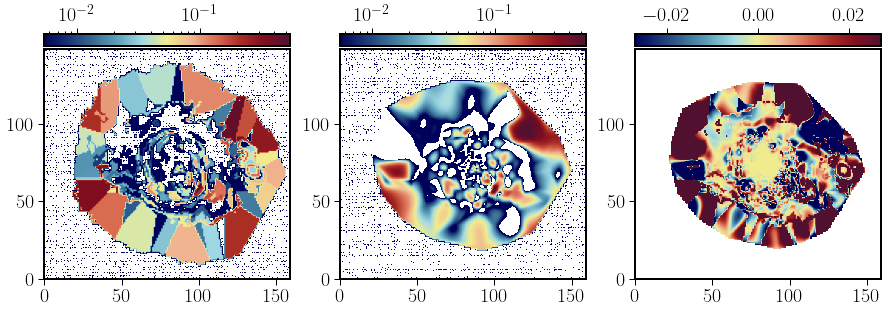

In [21]:
def CS_interp(org_map,CS_map,method='cubic', s_smooth=0.0, mask_value=0.0):
    cs_max = int(np.max(CS_map))
    cs_x = []
    cs_y = []
    cs_flux = []
    for i in arange(1,cs_max+1):
        ids = np.argwhere(CS_map==i)
        ids = np.array(ids)    
        I = []
        J = []    
        for j in arange(len(ids)):
            I.append(ids[j][0])
            J.append(ids[j][1])
        x_now = np.mean(np.array(J))
        y_now = np.mean(np.array(I))
        cs_y.append(y_now)
        cs_x.append(x_now)
    cs_x=np.array(cs_x)
    cs_y=np.array(cs_y)
    (ny,nx)=np.shape(CS_map)
    x_int = np.arange(0,nx,1)
    y_int = np.arange(0,ny,1)
    points=np.array((cs_x,cs_y)).T
    xx, yy = np.meshgrid(x_int, y_int)
    cs_flux=org_map[np.rint(points).astype(int)[:,1],np.rint(points).astype(int)[:,0]]
    map_int = griddata(points, cs_flux, (xx, yy), method=method)
    map_int[np.isnan(map_int)]=mask_value
    if (s_smooth>0):
        map_int=gaussian_filter(map_int, sigma=s_smooth)
    
    return(map_int)

#
# Interpolated version
#
map_int=CS_interp(org_map,CS_map,s_smooth=0.0)

min_val, max_val = np.abs(np.amin(org_map)), np.abs(np.amax(org_map))
min_val=0.01*max_val
fig,ax = plt.subplots(1,3,figsize=(15,6))

im0=ax[0].imshow(org_map,cmap=cmap,norm=LogNorm(vmin=min_val,vmax=max_val))
im1=ax[1].imshow(map_int,cmap=cmap,norm=LogNorm(vmin=min_val,vmax=max_val))
im2=ax[2].imshow(map_res,cmap=cmap,vmin=-0.05*max_val,vmax=0.05*max_val)
add_colorbar(im0)
add_colorbar(im1)
add_colorbar(im2)
#ax[0].colorbar()
#ax[0].scatter(cs_x,cs_y,edgecolor='none',s=2, color='black')
ax[0].set_xlim([0,nx-1])
ax[0].set_ylim([0,ny-1])
ax[1].set_xlim([0,nx-1])
ax[1].set_ylim([0,ny-1])
ax[2].set_xlim([0,nx-1])
ax[2].set_ylim([0,ny-1])

#print(map_int)

(0.0, 148.0)

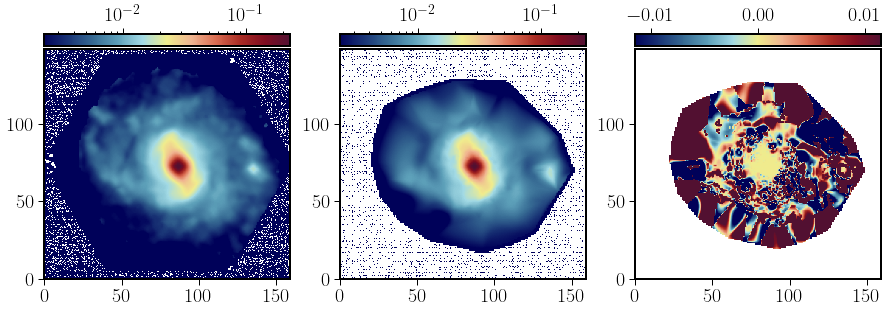

In [22]:
#
# Interpolated version
#
org_map=SSP_data[0]
map_int=CS_interp(org_map,CS_map,method='cubic',s_smooth=0.2)

min_val, max_val = np.abs(np.amin(org_map)), np.abs(np.amax(org_map))
min_val=0.01*max_val
fig,ax = plt.subplots(1,3,figsize=(15,6))

im0=ax[0].imshow(org_map,cmap=cmap,norm=LogNorm(vmin=min_val,vmax=max_val))
im1=ax[1].imshow(map_int,cmap=cmap,norm=LogNorm(vmin=min_val,vmax=max_val))
im2=ax[2].imshow(map_res,cmap=cmap,vmin=-0.05*max_val,vmax=0.05*max_val)
add_colorbar(im0)
add_colorbar(im1)
add_colorbar(im2)
#ax[0].colorbar()
#ax[0].scatter(cs_x,cs_y,edgecolor='none',s=2, color='black')
ax[0].set_xlim([0,nx-1])
ax[0].set_ylim([0,ny-1])
ax[1].set_xlim([0,nx-1])
ax[1].set_ylim([0,ny-1])
ax[2].set_xlim([0,nx-1])
ax[2].set_ylim([0,ny-1])
#print(map_int)

160 149 39
10


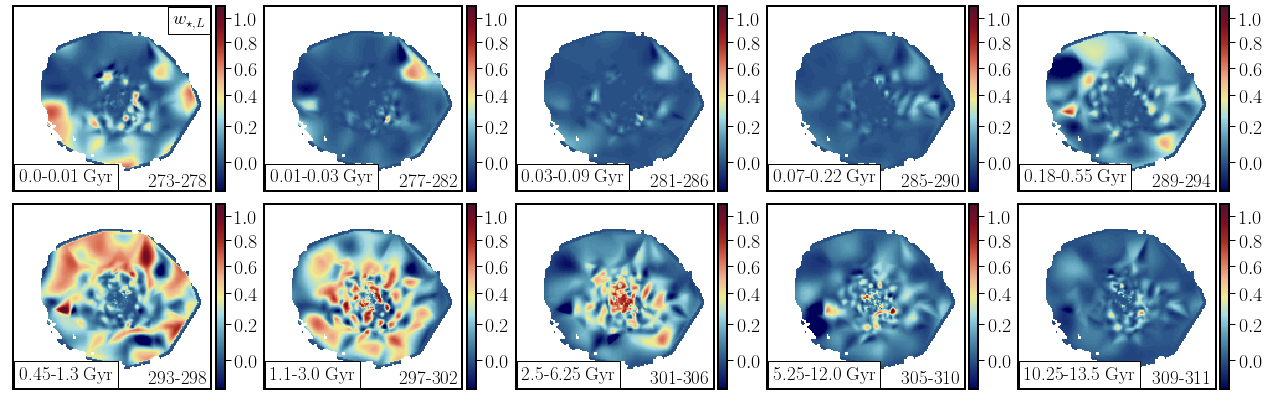

In [31]:
figname=name_now+".SFH_int"
#SELECT_REG_data=1 #Pipe3D_hdu[8].data
SFH_data=Pipe3D_hdu[2].data
SFH_hdr=Pipe3D_hdu[2].header
(nz,ny,nx)=SFH_data.shape
SFH_maps={}
SFH_labels={}
mark_labels={}
for i in arange(0,nz):
    key='DESC_'+str(i)
    SFH_labels[i]=SFH_hdr[key]
    mark_labels_now=SFH_labels[i]
    
    mark_labels_now=mark_labels_now.replace('Luminosity Fraction for age ','')
    mark_labels_now=mark_labels_now.replace(' SSP','')
    mark_labels[i]=mark_labels_now
#    print(i,mark_labels[i])
#    print(i,SFH_labels[i])

n_start=39*7
I_max=39
n_end=n_start+I_max
SFH_age=SFH_data[n_start:n_end,:,:]
(nz_age,ny_age,nx_age)=SFH_age.shape
print(nx_age,ny_age,nz_age)
n_bin=4
nz_bin=int(np.ceil(nz_age/n_bin))
mark_labels_bin={}
SFH_age_bin=np.zeros((nz_bin,ny_age,nx_age))
label_index={}
for i in arange(0,nz_bin):
    j_min=n_bin*i
    j_max=n_bin*(i+1)+1
    if (j_max>=I_max):
        j_max=I_max-1
    label_index[i]=str(j_min+n_start)+'-'+str(j_max+n_start)
    mark_labels_bin[i]=str(np.around(float(mark_labels[j_min+n_start]),2))+'-'+str(np.around(float(mark_labels[j_max+n_start]),2))+' Gyr'
#    mark_labels[j_min+n_start]+'-'+mark_labels[j_max+n_start]
    for j in arange(j_min,j_max):
        SFH_age_bin[i,:,:]=SFH_age_bin[i,:,:]+SFH_age[j,:,:]
#        print(i,mark_labels_bin[i])
#        print(i,j)

print(nz_bin)
NX=5
fig, axes = plt.subplots(int(np.ceil(nz_bin/NX)),NX, figsize=(int(3.6*NX),int(3*nz_bin/NX)))
#cmap='gist_stern_r'
#cmap='plasma'
#color_cm_now = vel_map()
color_cm_now = vel_map()
reverse=0
if (reverse==1):
    color_cm_now=color_cm_now.reversed()
cmap=cm.get_cmap(color_cm_now)



n_start=39*7
I_max=39
for I,ax in enumerate(axes.flat):
    if (I<nz_bin):
        indx=I+n_start
        key='DESC_'+str(indx)
        val=SFH_hdr[key]
#        print(key,val)
        image=CS_interp(SFH_age_bin[I,:,:],CS_map,s_smooth=0.5)
        image = np.ma.masked_invalid(image)
        image=image*SELECT_REG_data
        image=image*1.0
        image=np.ma.masked_array(image,\
                                 (image==0.0))
        image=np.around(image,2)
        vmin=np.min(image)
        vmax=np.max(image)
        norm=colors.PowerNorm(gamma=0.75)
        im_now=ax.imshow(image, interpolation='none',\
                         cmap=cmap, \
                         norm=norm,\
                         vmin=-0.1,vmax=1.1)
        fig.colorbar(im_now, ax=ax, orientation='vertical',fraction=0.046, pad=0.02)
        ax.set_xlim(0,nx)
        ax.set_ylim(0,ny)
        ax.text(0.03*nx, 0.03*ny, mark_labels_bin[I], fontsize=19, \
                bbox={'facecolor': 'white', 'pad': 5},\
                va='bottom',ha='left')
        if (I==0):
            ax.text(0.97*nx, 0.97*ny, r'$w_{\star,L}$', fontsize=19,\
                    bbox={'facecolor': 'white', 'pad': 5},\
                    va='top',ha='right')
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.text(0.97*nx, 0.1*ny, label_index[I], fontsize=19,\
                va='top',ha='right')        
    else:
        ax.set_visible(False)
    #ax.spines['left'].set_visible(False)
#    handles, labels = ax.get_legend_handles_labels()
#    ax.legend(handles, labels,loc=(0.05,0.75),frameon=True,handlelength=1.5)    
#fig.tight_layout()
fig.tight_layout(w_pad=0.15,h_pad=0.35)

fig.savefig(figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

#    SSP_maps[val]=SSP_data[i,:,:]
#print(SSP_maps['pseudo V-band map'])

#print(image)

160 149 39
20


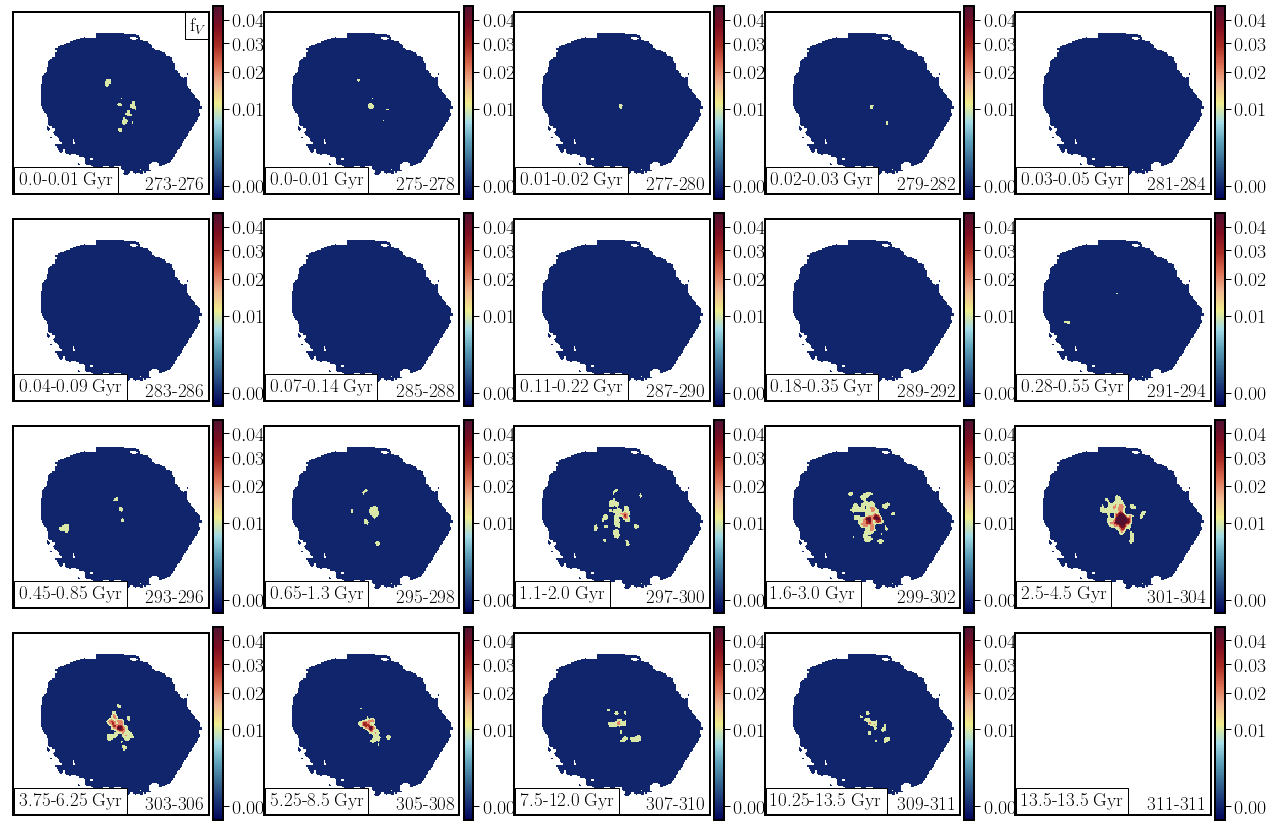

In [32]:
figname=name_now+".SFH_V_int"
#SELECT_REG_data=1 #Pipe3D_hdu[8].data
SFH_data=Pipe3D_hdu[2].data
SFH_hdr=Pipe3D_hdu[2].header
(nz,ny,nx)=SFH_data.shape
SFH_maps={}
SFH_labels={}
mark_labels={}
for i in arange(0,nz):
    key='DESC_'+str(i)
    SFH_labels[i]=SFH_hdr[key]
    mark_labels_now=SFH_labels[i]
    
    mark_labels_now=mark_labels_now.replace('Luminosity Fraction for age ','')
    mark_labels_now=mark_labels_now.replace(' SSP','')
    mark_labels[i]=mark_labels_now
#    print(i,mark_labels[i])
#    print(i,SFH_labels[i])

n_start=39*7
I_max=39
n_end=n_start+I_max
SFH_age=SFH_data[n_start:n_end,:,:]
(nz_age,ny_age,nx_age)=SFH_age.shape
print(nx_age,ny_age,nz_age)
n_bin=2
nz_bin=int(np.ceil(nz_age/n_bin))
mark_labels_bin={}
SFH_age_bin=np.zeros((nz_bin,ny_age,nx_age))
label_index={}
for i in arange(0,nz_bin):
    j_min=n_bin*i
    j_max=n_bin*(i+1)+1
    if (j_max>=I_max):
        j_max=I_max-1
    label_index[i]=str(j_min+n_start)+'-'+str(j_max+n_start)
    mark_labels_bin[i]=str(np.around(float(mark_labels[j_min+n_start]),2))+'-'+str(np.around(float(mark_labels[j_max+n_start]),2))+' Gyr'
#    mark_labels[j_min+n_start]+'-'+mark_labels[j_max+n_start]
    for j in arange(j_min,j_max):
        SFH_age_bin[i,:,:]=SFH_age_bin[i,:,:]+SFH_age[j,:,:]
#        print(i,mark_labels_bin[i])
#        print(i,j)

print(nz_bin)
NX=5
fig, axes = plt.subplots(int(np.ceil(nz_bin/NX)),NX, figsize=(int(3.6*NX),int(3*nz_bin/NX)))
#cmap='gist_stern_r'
#cmap='plasma'
#color_cm_now = vel_map()
color_cm_now = vel_map()
reverse=0
if (reverse==1):
    color_cm_now=color_cm_now.reversed()
cmap=cm.get_cmap(color_cm_now)



n_start=39*7
I_max=39
for I,ax in enumerate(axes.flat):
    if (I<nz_bin):
        indx=I+n_start
        key='DESC_'+str(indx)
        val=SFH_hdr[key]
#        print(key,val)
        image=CS_interp(SFH_age_bin[I,:,:],CS_map,s_smooth=1.0)
        image=image*V_map
        image = np.ma.masked_invalid(image)
        image=image*SELECT_REG_data
        image=image*1.0
        image=np.ma.masked_array(image,\
                                 (image==0.0))
        image=np.around(image,2)
        vmin=np.min(image)
        vmax=np.max(image)
        norm=colors.PowerNorm(gamma=0.5)
        im_now=ax.imshow(image, interpolation='none',\
                         cmap=cmap, \
                         norm=norm,\
                         vmin=-0.001*np.max(V_map),vmax=0.2*np.max(V_map))
        fig.colorbar(im_now, ax=ax, orientation='vertical',fraction=0.046, pad=0.02)
        ax.set_xlim(0,nx)
        ax.set_ylim(0,ny)
        ax.text(0.03*nx, 0.03*ny, mark_labels_bin[I], fontsize=19, \
                bbox={'facecolor': 'white', 'pad': 5},\
                va='bottom',ha='left')
        if (I==0):
            ax.text(0.97*nx, 0.97*ny, r'f$_{V}$', fontsize=19,\
                    bbox={'facecolor': 'white', 'pad': 5},\
                    va='top',ha='right')
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.text(0.97*nx, 0.1*ny, label_index[I], fontsize=19,\
                va='top',ha='right')        
    else:
        ax.set_visible(False)
    #ax.spines['left'].set_visible(False)
#    handles, labels = ax.get_legend_handles_labels()
#    ax.legend(handles, labels,loc=(0.05,0.75),frameon=True,handlelength=1.5)    
#fig.tight_layout()
fig.tight_layout(w_pad=0.15,h_pad=0.35)

fig.savefig(figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

#    SSP_maps[val]=SSP_data[i,:,:]
#print(SSP_maps['pseudo V-band map'])

#print(image)

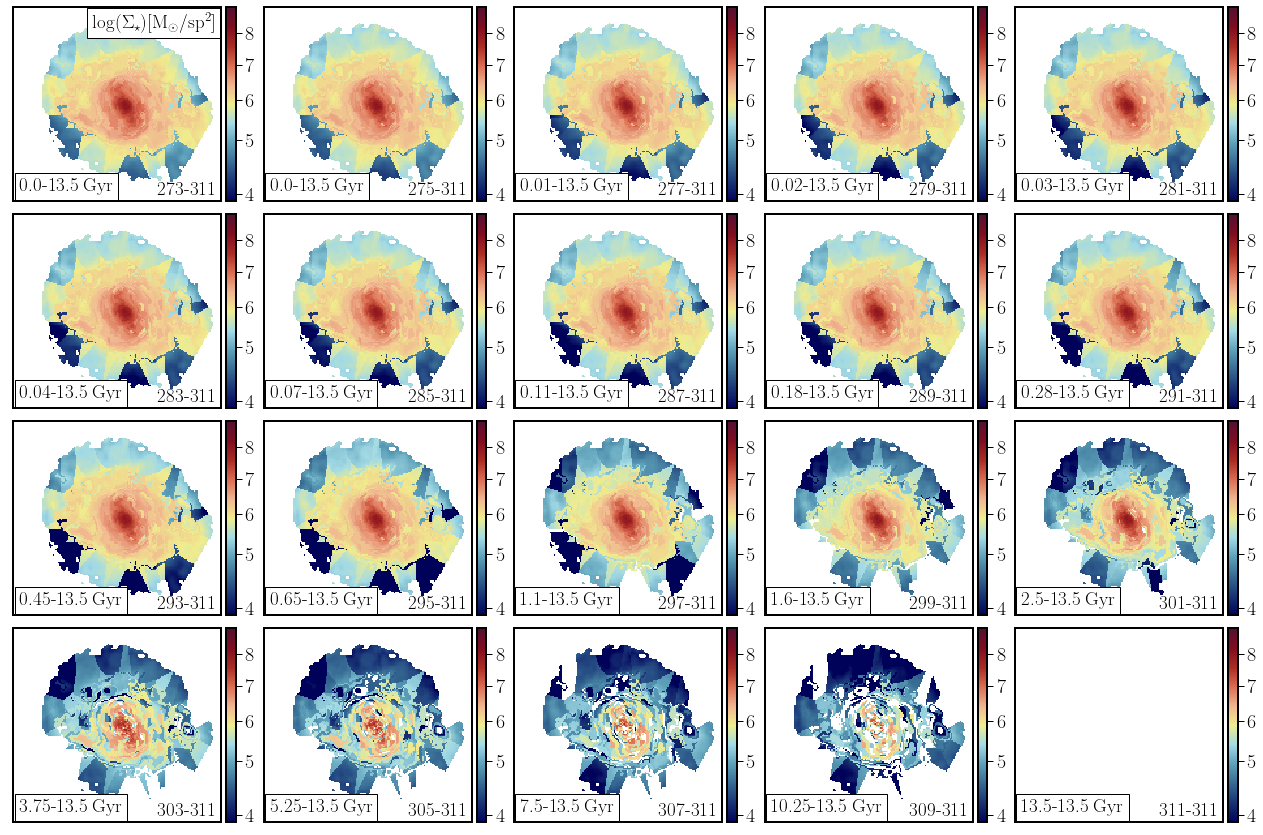

In [25]:
figname=name_now+".SFH_CM"
#SELECT_REG_data=1 #Pipe3D_hdu[8].data
SFH_data=Pipe3D_hdu[2].data
SFH_hdr=Pipe3D_hdu[2].header
(nz,ny,nx)=SFH_data.shape
SFH_maps={}
SFH_labels={}
mark_labels={}
for i in arange(0,nz):
    key='DESC_'+str(i)
    SFH_labels[i]=SFH_hdr[key]
    mark_labels_now=SFH_labels[i]
    
    mark_labels_now=mark_labels_now.replace('Luminosity Fraction for age ','')
    mark_labels_now=mark_labels_now.replace(' SSP','')
    mark_labels[i]=mark_labels_now
#    print(i,mark_labels[i])
#    print(i,SFH_labels[i])

n_start=39*7
I_max=39
n_end=n_start+I_max
SFH_age=SFH_data[n_start:n_end,:,:]
(nz_age,ny_age,nx_age)=SFH_age.shape
#print(nx_age,ny_age,nz_age)
n_bin=2
nz_bin=int(np.ceil(nz_age/n_bin))
mark_labels_bin={}
SFH_age_bin=np.zeros((nz_bin,ny_age,nx_age))
label_index={}
for i in arange(0,nz_bin):
    j_min=n_bin*i
    j_max=I_max-1#n_bin*(i+1)+1
    #if (j_max>=I_max):
    #    j_max=I_max-1
    label_index[i]=str(j_min+n_start)+'-'+str(j_max+n_start)
    mark_labels_bin[i]=str(np.around(float(mark_labels[j_min+n_start]),2))+'-'+str(np.around(float(mark_labels[j_max+n_start]),2))+' Gyr'
#    mark_labels[j_min+n_start]+'-'+mark_labels[j_max+n_start]
    for j in arange(j_min,j_max):
        SFH_age_bin[i,:,:]=SFH_age_bin[i,:,:]+SFH_age[j,:,:]*10**(SSP_data[18,:,:])*SSP_data[2,:,:]
        
    SFH_age_bin[i,:,:]=np.log10(SFH_age_bin[i,:,:])
#    print(i,mark_labels_bin[i])
#        print(i,j)

#print(nz_bin)
NX=5
fig, axes = plt.subplots(int(np.ceil(nz_bin/NX)),NX, figsize=(int(3.6*NX),int(3*nz_bin/NX)))
#cmap='gist_stern_r'
#cmap='plasma'
#color_cm_now = vel_map()
color_cm_now = vel_map()
reverse=0
if (reverse==1):
    color_cm_now=color_cm_now.reversed()
cmap=cm.get_cmap(color_cm_now)



n_start=39*7
I_max=39
for I,ax in enumerate(axes.flat):
    if (I<nz_bin):
        indx=I+n_start
        key='DESC_'+str(indx)
        val=SFH_hdr[key]
#        print(key,val)
        image=SFH_age_bin[I,:,:]
        image = np.ma.masked_invalid(image)
        image=image*SELECT_REG_data
        image=image*1.0
        image=np.ma.masked_array(image,\
                                 (image==0.0))
        image=np.around(image,2)
        vmin=np.nanmin(SSP_data[18,:,:][SSP_data[18,:,:]>0])
        vmax=np.nanmax(SSP_data[18,:,:][SSP_data[18,:,:]>0])
#        vmin=np.nanmin(image[image>0])
#        vmax=np.nanmax(image[image>0])
        #print(I,vmin,vmax)
        norm=colors.PowerNorm(gamma=0.75)
        im_now=ax.imshow(image, interpolation='none',\
                         cmap=cmap, \
                         norm=norm,\
                         vmin=vmin*0.9,vmax=vmax*1.1)
        fig.colorbar(im_now, ax=ax, orientation='vertical',fraction=0.046, pad=0.02)
        ax.set_xlim(0,nx)
        ax.set_ylim(0,ny)
        ax.text(0.03*nx, 0.03*ny, mark_labels_bin[I], fontsize=19, bbox={'facecolor': 'white', 'pad': 5},\
                va='bottom',ha='left')
        if (I==0):
            ax.text(0.97*nx, 0.97*ny, r'log($\Sigma_\star$)[M$_\odot$/sp$^2$]', fontsize=19, bbox={'facecolor': 'white', 'pad': 5},\
                    va='top',ha='right')
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.text(0.97*nx, 0.1*ny, label_index[I], fontsize=19,\
                va='top',ha='right')
    else:
        ax.set_visible(False)
        
    #ax.spines['left'].set_visible(False)
#    handles, labels = ax.get_legend_handles_labels()
#    ax.legend(handles, labels,loc=(0.05,0.75),frameon=True,handlelength=1.5)    
#fig.tight_layout()
fig.tight_layout(w_pad=0.15,h_pad=0.35)

fig.savefig(figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

#    SSP_maps[val]=SSP_data[i,:,:]
#print(SSP_maps['pseudo V-band map'])

#print(nx)

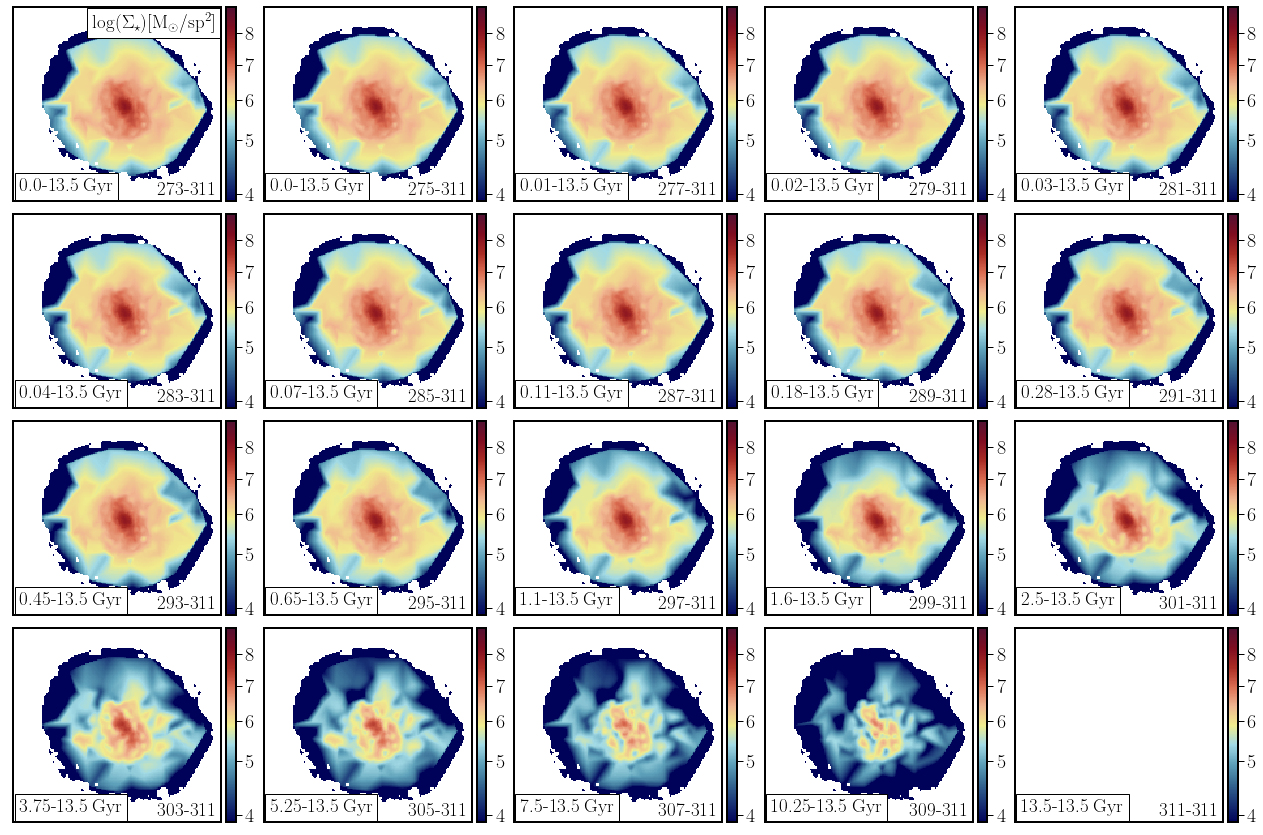

In [26]:
figname=name_now+".SFH_CM_int"
#SELECT_REG_data=1 #Pipe3D_hdu[8].data
SFH_data=Pipe3D_hdu[2].data
SFH_hdr=Pipe3D_hdu[2].header
(nz,ny,nx)=SFH_data.shape
SFH_maps={}
SFH_labels={}
mark_labels={}
for i in arange(0,nz):
    key='DESC_'+str(i)
    SFH_labels[i]=SFH_hdr[key]
    mark_labels_now=SFH_labels[i]
    
    mark_labels_now=mark_labels_now.replace('Luminosity Fraction for age ','')
    mark_labels_now=mark_labels_now.replace(' SSP','')
    mark_labels[i]=mark_labels_now
#    print(i,mark_labels[i])
#    print(i,SFH_labels[i])

n_start=39*7
I_max=39
n_end=n_start+I_max
SFH_age=SFH_data[n_start:n_end,:,:]
(nz_age,ny_age,nx_age)=SFH_age.shape
#print(nx_age,ny_age,nz_age)
log_Mass_map=CS_interp(SSP_data[18,:,:],CS_map,method='linear',s_smooth=0.5)

n_bin=2
nz_bin=int(np.ceil(nz_age/n_bin))
mark_labels_bin={}
SFH_age_bin=np.zeros((nz_bin,ny_age,nx_age))
label_index={}
for i in arange(0,nz_bin):
    j_min=n_bin*i
    j_max=I_max-1#n_bin*(i+1)+1
    #if (j_max>=I_max):
    #    j_max=I_max-1
    label_index[i]=str(j_min+n_start)+'-'+str(j_max+n_start)
    mark_labels_bin[i]=str(np.around(float(mark_labels[j_min+n_start]),2))+'-'+str(np.around(float(mark_labels[j_max+n_start]),2))+' Gyr'
#    mark_labels[j_min+n_start]+'-'+mark_labels[j_max+n_start]
    for j in arange(j_min,j_max):
        SFH_age_now=CS_interp(SFH_age[j,:,:],CS_map,method='linear',s_smooth=1.5)
        SFH_age_bin[i,:,:]=SFH_age_bin[i,:,:]+SFH_age_now*10**(log_Mass_map)#*SSP_data[2,:,:]
        
    SFH_age_bin[i,:,:]=np.log10(SFH_age_bin[i,:,:])
#    print(i,mark_labels_bin[i])
#        print(i,j)

#print(nz_bin)
NX=5
fig, axes = plt.subplots(int(np.ceil(nz_bin/NX)),NX, figsize=(int(3.6*NX),int(3*nz_bin/NX)))
#cmap='gist_stern_r'
#cmap='plasma'
#color_cm_now = vel_map()
color_cm_now = vel_map()
reverse=0
if (reverse==1):
    color_cm_now=color_cm_now.reversed()
cmap=cm.get_cmap(color_cm_now)



n_start=39*7
I_max=39
for I,ax in enumerate(axes.flat):
    if (I<nz_bin):
        indx=I+n_start
        key='DESC_'+str(indx)
        val=SFH_hdr[key]
#        print(key,val)
        image=SFH_age_bin[I,:,:]
        #image=CS_interp(SFH_age_bin[I,:,:],CS_map)#,s_smooth=0.5) 
        image = np.ma.masked_invalid(image)
        image=image*SELECT_REG_data
        image=image*1.0
        image=np.ma.masked_array(image,\
                                 (image==0.0))
        image=np.around(image,2)
        vmin=np.nanmin(SSP_data[18,:,:][SSP_data[18,:,:]>0])
        vmax=np.nanmax(SSP_data[18,:,:][SSP_data[18,:,:]>0])
#        vmin=np.nanmin(image[image>0])
#        vmax=np.nanmax(image[image>0])
        #print(I,vmin,vmax)
        norm=colors.PowerNorm(gamma=0.75)
        im_now=ax.imshow(image, interpolation='none',\
                         cmap=cmap, \
                         norm=norm,\
                         vmin=vmin*0.9,vmax=vmax*1.1)
        fig.colorbar(im_now, ax=ax, orientation='vertical',fraction=0.046, pad=0.02)
        ax.set_xlim(0,nx)
        ax.set_ylim(0,ny)
        ax.text(0.03*nx, 0.03*ny, mark_labels_bin[I], fontsize=19, bbox={'facecolor': 'white', 'pad': 5},\
                va='bottom',ha='left')
        if (I==0):
            ax.text(0.97*nx, 0.97*ny, r'log($\Sigma_\star$)[M$_\odot$/sp$^2$]', fontsize=19, bbox={'facecolor': 'white', 'pad': 5},\
                    va='top',ha='right')
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.text(0.97*nx, 0.1*ny, label_index[I], fontsize=19,\
                va='top',ha='right')
    else:
        ax.set_visible(False)
        
    #ax.spines['left'].set_visible(False)
#    handles, labels = ax.get_legend_handles_labels()
#    ax.legend(handles, labels,loc=(0.05,0.75),frameon=True,handlelength=1.5)    
#fig.tight_layout()
fig.tight_layout(w_pad=0.15,h_pad=0.35)

fig.savefig(figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

#    SSP_maps[val]=SSP_data[i,:,:]
#print(SSP_maps['pseudo V-band map'])

#print(nx)

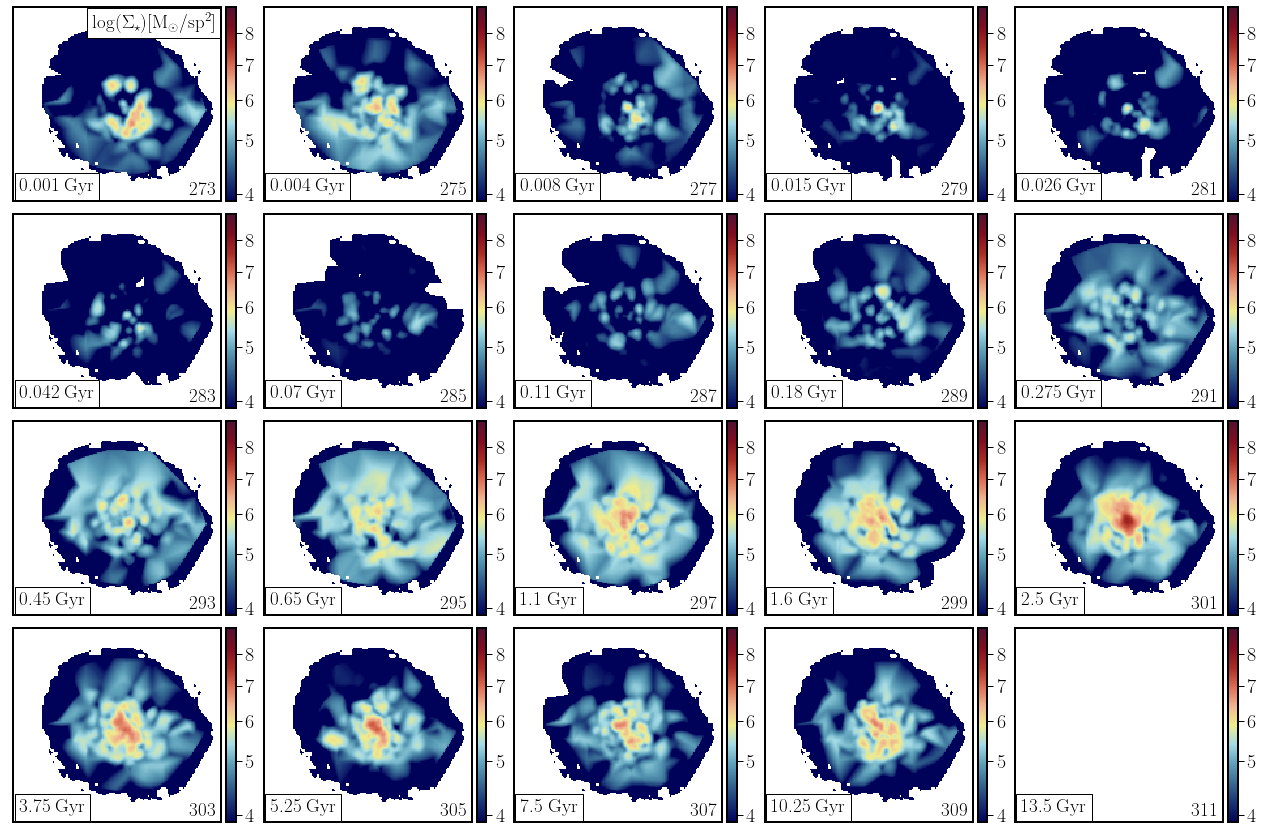

In [27]:
figname=name_now+".SFHR_CM_int"
#SELECT_REG_data=1 #Pipe3D_hdu[8].data
SFH_data=Pipe3D_hdu[2].data
SFH_hdr=Pipe3D_hdu[2].header
(nz,ny,nx)=SFH_data.shape
SFH_maps={}
SFH_labels={}
mark_labels={}
for i in arange(0,nz):
    key='DESC_'+str(i)
    SFH_labels[i]=SFH_hdr[key]
    mark_labels_now=SFH_labels[i]
    
    mark_labels_now=mark_labels_now.replace('Luminosity Fraction for age ','')
    mark_labels_now=mark_labels_now.replace(' SSP','')
    mark_labels[i]=mark_labels_now
#    print(i,mark_labels[i])
#    print(i,SFH_labels[i])

n_start=39*7
I_max=39
n_end=n_start+I_max
SFH_age=SFH_data[n_start:n_end,:,:]
(nz_age,ny_age,nx_age)=SFH_age.shape
#print(nx_age,ny_age,nz_age)
log_Mass_map=CS_interp(SSP_data[18,:,:],CS_map,method='linear',s_smooth=0.5)

n_bin=2
nz_bin=int(np.ceil(nz_age/n_bin))
mark_labels_bin={}
SFH_age_bin=np.zeros((nz_bin,ny_age,nx_age))
SFH_age_bin_tmp=np.zeros((nz_bin,ny_age,nx_age))
label_index={}
for i in arange(0,nz_bin):
    j_min=n_bin*i
    j_max=I_max-1#n_bin*(i+1)+1
    #if (j_max>=I_max):
    #    j_max=I_max-1
    label_index[i]=str(j_min+n_start)#+'-'+str(j_max+n_start)
    mark_labels_bin[i]=str(np.around(float(mark_labels[j_min+n_start]),3))+' Gyr'
#    mark_labels[j_min+n_start]+'-'+mark_labels[j_max+n_start]
    for j in arange(j_min,j_max):
        SFH_age_now=CS_interp(SFH_age[j,:,:],CS_map,method='linear',s_smooth=1.5)
        SFH_age_bin_tmp[i,:,:]=SFH_age_bin_tmp[i,:,:]+SFH_age_now*10**(log_Mass_map)#*SSP_data[2,:,:]
        
for i in arange(0,nz_bin-1):
    SFH_age_bin[i,:,:]=SFH_age_bin_tmp[i,:,:]-SFH_age_bin_tmp[i+1,:,:]
    SFH_age_bin[i,:,:]=np.log10(SFH_age_bin[i,:,:])
SFH_age_bin[nz_bin-1,:,:]=np.log10(SFH_age_bin_tmp[nz_bin-1,:,:])
#    SFH_age_bin[i,:,:]=np.log10(SFH_age_bin[i,:,:])
#    print(i,mark_labels_bin[i])
#        print(i,j)

#print(nz_bin)
NX=5
fig, axes = plt.subplots(int(np.ceil(nz_bin/NX)),NX, figsize=(int(3.6*NX),int(3*nz_bin/NX)))
#cmap='gist_stern_r'
#cmap='plasma'
#color_cm_now = vel_map()
color_cm_now = vel_map()
reverse=0
if (reverse==1):
    color_cm_now=color_cm_now.reversed()
cmap=cm.get_cmap(color_cm_now)

N_MET=7

n_start=39*N_MET
I_max=39
for I,ax in enumerate(axes.flat):
    if (I<nz_bin):
        indx=I+n_start
        key='DESC_'+str(indx)
        val=SFH_hdr[key]
#        print(key,val)
        image=SFH_age_bin[I,:,:]
        #image=CS_interp(SFH_age_bin[I,:,:],CS_map)#,s_smooth=0.5) 
        image = np.ma.masked_invalid(image)
        image=image*SELECT_REG_data
        image=image*1.0
        image=np.ma.masked_array(image,\
                                 (image==0.0))
        image=np.around(image,2)
        vmin=np.nanmin(SSP_data[18,:,:][SSP_data[18,:,:]>0])
        vmax=np.nanmax(SSP_data[18,:,:][SSP_data[18,:,:]>0])
#        vmin=np.nanmin(image[image>0])
#        vmax=np.nanmax(image[image>0])
        #print(I,vmin,vmax)
        norm=colors.PowerNorm(gamma=0.75)
        im_now=ax.imshow(image, interpolation='none',\
                         cmap=cmap, \
                         norm=norm,\
                         vmin=vmin*0.9,vmax=vmax*1.1)
        fig.colorbar(im_now, ax=ax, orientation='vertical',fraction=0.046, pad=0.02)
        ax.set_xlim(0,nx)
        ax.set_ylim(0,ny)
        ax.text(0.03*nx, 0.03*ny, mark_labels_bin[I], fontsize=19, bbox={'facecolor': 'white', 'pad': 5},\
                va='bottom',ha='left')
        if (I==0):
            ax.text(0.97*nx, 0.97*ny, r'log($\Sigma_\star$)[M$_\odot$/sp$^2$]', fontsize=19, bbox={'facecolor': 'white', 'pad': 5},\
                    va='top',ha='right')
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.text(0.97*nx, 0.1*ny, label_index[I], fontsize=19,\
                va='top',ha='right')
    else:
        ax.set_visible(False)
        
    #ax.spines['left'].set_visible(False)
#    handles, labels = ax.get_legend_handles_labels()
#    ax.legend(handles, labels,loc=(0.05,0.75),frameon=True,handlelength=1.5)    
#fig.tight_layout()
fig.tight_layout(w_pad=0.15,h_pad=0.35)

fig.savefig(figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

#    SSP_maps[val]=SSP_data[i,:,:]
#print(SSP_maps['pseudo V-band map'])

#print(nx)

DESC_0 pseudo V-band map
DESC_1  continuum segmentation file
DESC_2  continuum dezonification file
DESC_3  median intensity flux within the wavelength range
DESC_4  StdDev median intensity flux within the wavelength range
DESC_5  luminosity weighted age of the stellar population
DESC_6  mass weighted age of the stellar population
DESC_7  error of the age of the stellar population
DESC_8  luminosity weighted metallicity of the stellar population
DESC_9  mass weighted metallicity of the stellar population
DESC_10  error metallicity of the stellar population
DESC_11  average dust attnuation of the stellar population
DESC_12  error of the average dust attnuation of the stellar population
DESC_13  velocity of the stellar population
DESC_14  error in the velocity of the stellar population
DESC_15  velocity dispersion of the stellar population
DESC_16  error in velocity dispersion of the stellar population
DESC_17  average mass-to-light ratio of the stellar population
DESC_18  stellar mass de

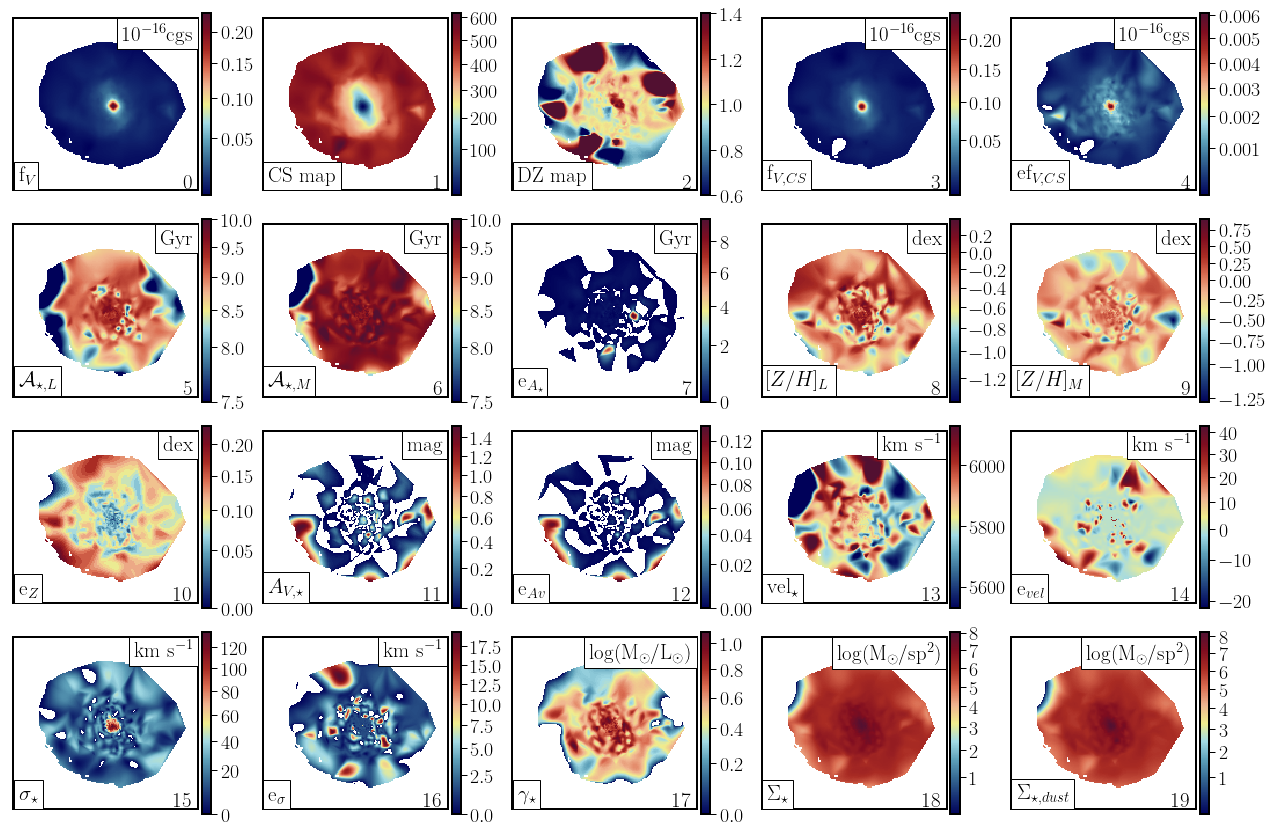

In [34]:
figname=name_now+".SSP_int"
#SELECT_REG_data=1 #Pipe3D_hdu[8].data
SSP_data=Pipe3D_hdu[1].data
SSP_hdr=Pipe3D_hdu[1].header
(nz,ny,nx)=SSP_data.shape
SSP_maps={}
#labels=['V-band img','CS map','DZ map','']
#for i in arange(0,nz,1):
#    key='DESC_'+str(i)
#    val=SSP_hdr[key]
#print(SELECT_REG_data)

SSP_labels={}#np.zeros(nz)
SSP_labels[0]=r'f$_V$'
SSP_labels[1]='CS map'
SSP_labels[2]='DZ map'
SSP_labels[3]=r'f$_{V,CS}$'#DESC_3  median intensity flux within the wavelength range
SSP_labels[4]=r'ef$_{V,CS}$'#  StdDev median intensity flux within the wavelength range
SSP_labels[5]=r'$\mathcal{A}_{\star,L}$'#  luminosity weighted age of the stellar population
SSP_labels[6]=r'$\mathcal{A}_{\star,M}$'#  mass weighted age of the stellar population
SSP_labels[7]=r'e$_{A_\star}$'  #error of the age of the stellar population
SSP_labels[8]=r'$[Z/H]_L$'#  luminosity weighted metallicity of the stellar population
SSP_labels[9]=r'$[Z/H]_M$'#  mass weighted metallicity of the stellar population
SSP_labels[10]=r'e$_{Z}$'#  error metallicity of the stellar population
SSP_labels[11]=r'$A_{V,\star}$'#  average dust attnuation of the stellar population
SSP_labels[12]=r'e$_{Av}$'#  error of the average dust attnuation of the stellar population
SSP_labels[13]=r'vel$_\star$'#  velocity of the stellar population
SSP_labels[14]=r'e$_{vel}$'#  error in the velocity of the stellar population
SSP_labels[15]=r'$\sigma_\star$'#  velocity dispersion of the stellar population
SSP_labels[16]=r'e$_\sigma$'#  error in velocity dispersion of the stellar population
SSP_labels[17]=r'$\gamma_\star$'#  average mass-to-light ratio of the stellar population
SSP_labels[18]=r'$\Sigma_\star$'#  stellar mass density
SSP_labels[19]=r'$\Sigma_{\star,dust}$' #   stellar mass density dust corrected

SSP_ulabels={}#np.zeros(nz)
SSP_ulabels[0]='10$^{-16}$cgs'
SSP_ulabels[1]=''
SSP_ulabels[2]=''
SSP_ulabels[3]=r'10$^{-16}$cgs'#DESC_3  median intensity flux within the wavelength range
SSP_ulabels[4]=r'10$^{-16}$cgs'#  StdDev median intensity flux within the wavelength range
SSP_ulabels[5]=r'Gyr'#  luminosity weighted age of the stellar population
SSP_ulabels[6]=r'Gyr'#  mass weighted age of the stellar population
SSP_ulabels[7]=r'Gyr'  #error of the age of the stellar population
SSP_ulabels[8]=r'dex'#  luminosity weighted metallicity of the stellar population
SSP_ulabels[9]=r'dex'#  mass weighted metallicity of the stellar population
SSP_ulabels[10]=r'dex'#  error metallicity of the stellar population
SSP_ulabels[11]=r'mag'#  average dust attnuation of the stellar population
SSP_ulabels[12]=r'mag'#  error of the average dust attnuation of the stellar population
SSP_ulabels[13]=r'km s$^{-1}$'#  velocity of the stellar population
SSP_ulabels[14]=r'km s$^{-1}$'#  error in the velocity of the stellar population
SSP_ulabels[15]=r'km s$^{-1}$'#  velocity dispersion of the stellar population
SSP_ulabels[16]=r'km s$^{-1}$'#  error in velocity dispersion of the stellar population
SSP_ulabels[17]=r'log(M$_\odot$/L$_\odot$)'#  average mass-to-light ratio of the stellar population
SSP_ulabels[18]=r'log(M$_\odot$/sp$^2$)'#  stellar mass density
SSP_ulabels[19]=r'log(M$_\odot$/sp$^2$)' #   stellar mass density dust corrected



fig, axes = plt.subplots(4,5, figsize=(18,12))
#cmap='gist_stern_r'
#cmap='plasma'
#color_cm_now = vel_map()
color_cm_now = vel_map()
reverse=0
if (reverse==1):
    color_cm_now=color_cm_now.reversed()
cmap=cm.get_cmap(color_cm_now)

for indx,ax in enumerate(axes.flat):
    key='DESC_'+str(indx)
    val=SSP_hdr[key]
    print(key,val)
    if ((indx==13) or (indx==14)):
        s_smooth=1.0
    else:
        s_smooth=0.1
    image=CS_interp(SSP_data[indx,:,:],CS_map,method='cubic',s_smooth=0.1)
    #image=SSP_data[indx,:,:]
    image = np.ma.masked_invalid(image)
    image=image*SELECT_REG_data
    image=image*1.0
    if ((indx!=13) and (indx!=14) and (indx!=8) and (indx!=9)):
        image=np.ma.masked_array(image,\
                                 ~(image>0.0))
    else:
        image=np.ma.masked_array(image,\
                                 (image==0.0))
    if ((indx!=0) and (indx!=3) and (indx!=4) and (indx!=12)):
        image=np.around(image,2)
    vmin=np.min(image)
    vmax=np.max(image)
    norm=colors.PowerNorm(gamma=0.75)
    if ((indx==5) or (indx==6)):
        vmin=7.5
        vmax=10.0
    if (indx==13):
        vmin=np.ma.median(image)-300
        vmax=np.ma.median(image)+300
        norm=None
    if (indx==2):
        vmin=1.4
        vmax=0.6
        norm=None
#        print(indx,val,vmin,vmax)
    im_now=ax.imshow(image, interpolation='none',\
                     cmap=cmap, \
                     norm=norm,\
                      vmin=vmin,vmax=vmax)
    fig.colorbar(im_now, ax=ax, orientation='vertical',fraction=0.046, pad=0.02)
    ax.set_xlim(0,nx)
    ax.set_ylim(0,ny)
    ax.text(0.03*nx, 0.03*ny, SSP_labels[indx], fontsize=21, bbox={'facecolor': 'white', 'pad': 5},\
           va='bottom',ha='left')
    ax.text(0.97*nx, 0.97*ny, SSP_ulabels[indx], fontsize=21, bbox={'facecolor': 'white', 'pad': 5},\
            va='top',ha='right')
    ax.text(0.97*nx, 0.1*ny, str(indx), fontsize=21,\
            va='top',ha='right')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    #ax.spines['left'].set_visible(False)
#    handles, labels = ax.get_legend_handles_labels()
#    ax.legend(handles, labels,loc=(0.05,0.75),frameon=True,handlelength=1.5)    
#fig.tight_layout()
fig.tight_layout(w_pad=0.35,h_pad=0.35)

fig.savefig(figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

#    SSP_maps[val]=SSP_data[i,:,:]
#print(SSP_maps['pseudo V-band map'])

#print(nx)

In [29]:
#print(len(points),len(cs_flux),len(x_int))
#print(np.rint(points))
#print(np.rint(points).astype(int))

val_flux=org_map[np.rint(points).astype(int)[:,1],np.rint(points).astype(int)[:,0]]
#print(len(val_flux))
#plt.scatter(val_flux,cs_flux)